In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf 
import datetime as dt
import matplotlib.pyplot as plt 
import plotly.graph_objs as go

In [2]:
# yfinance returns data for all strokes for a single expiration at a time 
# Its easier to work with all strikes and expirations at the same time so 
# ! This function combines all expirations


def option_chains(ticker):
    
    asset = yf.Ticker(ticker)
    expirations = asset.options
    
    chains = pd.DataFrame()
    
    for expiration in expirations:
        # tuple of two dataframes
        opt = asset.option_chain(expiration)
        
        calls = opt.calls
        calls['optionType'] = "call"
        
        puts = opt.puts
        puts['optionType'] = "put"
        
        chain = pd.concat([calls, puts])
        chain['expiration'] = pd.to_datetime(expiration) + pd.DateOffset(hours=23, minutes=59, seconds=59)
        
        chains = pd.concat([chains, chain])
    
    chains["daysToExpiration"] = (chains.expiration - dt.datetime.today()).dt.days + 1
    
    return chains
        

<h3> Analyze skew and term structure </h3>

<AxesSubplot:title={'center':'Implied Volatility Skew'}, xlabel='strike'>

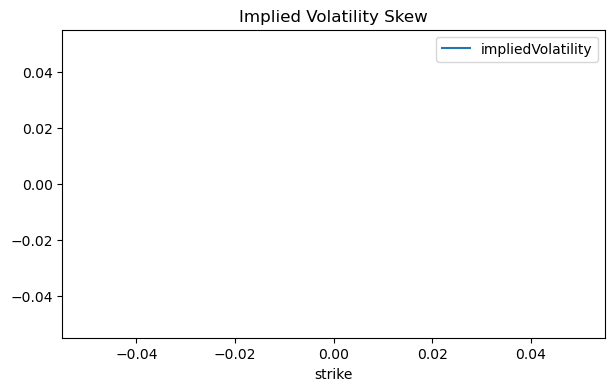

In [3]:
options = option_chains("NTLA")

calls = options[options["optionType"] == "call"]

# print the expirations
set(calls.expiration)

# select an expiration to plot
calls_at_expiry = calls[calls["expiration"] == "2023-04-14 23:59:59"]

# filter out low vols
filtered_calls_at_expiry = calls_at_expiry[calls_at_expiry.impliedVolatility >= 0.001]

# set the strike as the index so pandas plots nicely
filtered_calls_at_expiry[["strike", "impliedVolatility"]].set_index("strike").plot(
    title="Implied Volatility Skew", figsize=(7, 4)
)

<p># for the given date 4-11-2023 it is noted that volatility at estimated 405 is considered the lowest. Todays close was $408.05</p>

<h3>Call Implied Volatility Term Structure</h3>

<AxesSubplot:title={'center':'Implied Volatility Term Structure'}, xlabel='expiration'>

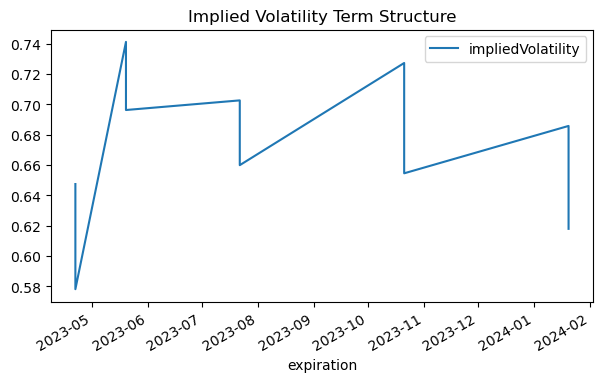

In [4]:
# select an expiration to plot
calls_at_strike = options[options["strike"] == 40.0]

# filter out low vols
filtered_calls_at_strike = calls_at_strike[calls_at_strike.impliedVolatility >= 0.001]

# set the strike as the index so pandas plots nicely
filtered_calls_at_strike[["expiration", "impliedVolatility"]].set_index("expiration").plot(
    title="Implied Volatility Term Structure", figsize=(7, 4)
)

<h4> Plot Volatility Surface </h4>

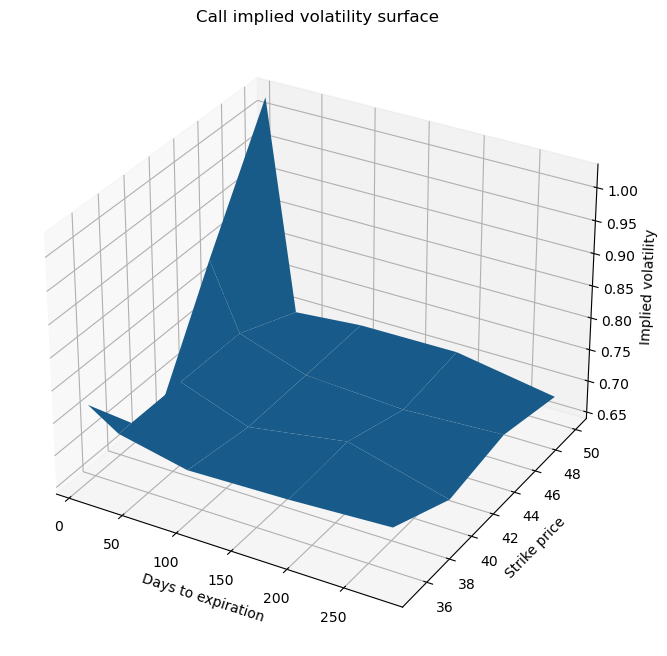

In [5]:
# pivot the dataframe
surface = (
    calls[['daysToExpiration', 'strike', 'impliedVolatility']]
    .pivot_table(values='impliedVolatility', index='strike', columns='daysToExpiration')
    .dropna()
)

# create the figure object
fig = plt.figure(figsize=(10, 8))

# add the subplot with projection argument
ax = fig.add_subplot(111, projection='3d')

# get the 1d values from the pivoted dataframe
x, y, z = surface.columns.values, surface.index.values, surface.values

# return coordinate matrices from coordinate vectors
X, Y = np.meshgrid(x, y)

# set labels
ax.set_xlabel('Days to expiration')
ax.set_ylabel('Strike price')
ax.set_zlabel('Implied volatility')
ax.set_title('Call implied volatility surface')

# plot
ax.plot_surface(X, Y, z)

In [6]:
# pivot the dataframe
surface = (
    calls[['daysToExpiration', 'strike', 'impliedVolatility']]
    .pivot_table(values='impliedVolatility', index='strike', columns='daysToExpiration')
    .dropna()
)

# get the 1d values from the pivoted dataframe
x, y, z = surface.columns.values, surface.index.values, surface.values

# create trace for the surface plot
trace = go.Surface(x=x, y=y, z=z)

# create layout for the plot
layout = go.Layout(
    title='Call Volatility Surface',
    scene=dict(
        xaxis=dict(title='Days to Expiration'),
        yaxis=dict(title='Strike Price'),
        zaxis=dict(title='Implied Volatility')
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# create figure object and add trace to it
fig = go.Figure(data=[trace], layout=layout)

# display the plot
fig.show()



<h3> Put Data </h3>

<AxesSubplot:title={'center':'Implied Volatility Skew'}, xlabel='strike'>

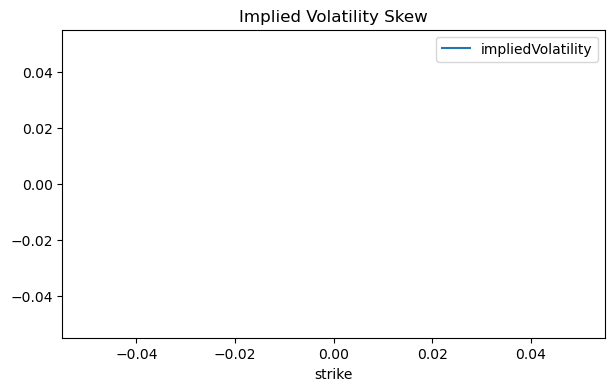

In [7]:
options = option_chains("NTLA")

puts = options[options["optionType"] == "put"]

# print the expirations
set(puts.expiration)

# select an expiration to plot
puts_at_expiry = puts[puts["expiration"] == "2023-04-14 23:59:59"]

# filter out low vols
filtered_puts_at_expiry = puts_at_expiry[puts_at_expiry.impliedVolatility >= 0.001]

# set the strike as the index so pandas plots nicely
filtered_puts_at_expiry[["strike", "impliedVolatility"]].set_index("strike").plot(
    title="Implied Volatility Skew", figsize=(7, 4)
)

<AxesSubplot:title={'center':'Implied Volatility Term Structure'}, xlabel='expiration'>

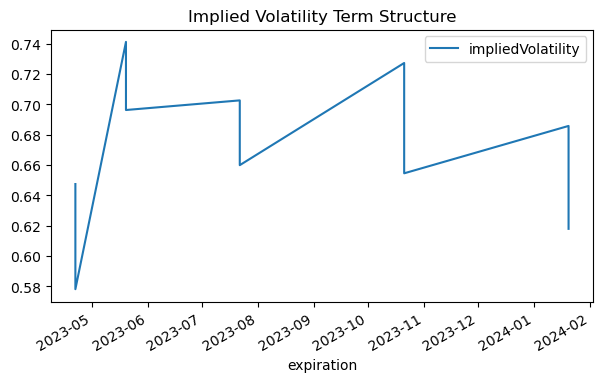

In [8]:
# select an expiration to plot
puts_at_strike = options[options["strike"] == 40.0]

# filter out low vols
filtered_puts_at_strike = puts_at_strike[puts_at_strike.impliedVolatility >= 0.001]

# set the strike as the index so pandas plots nicely
filtered_puts_at_strike[["expiration", "impliedVolatility"]].set_index("expiration").plot(
    title="Implied Volatility Term Structure", figsize=(7, 4)
)

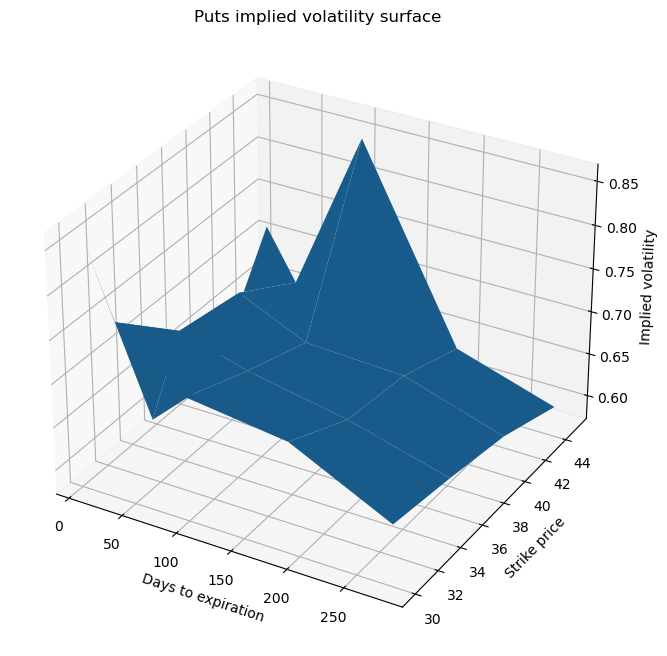

In [9]:
# pivot the dataframe
surface = (
    puts[['daysToExpiration', 'strike', 'impliedVolatility']]
    .pivot_table(values='impliedVolatility', index='strike', columns='daysToExpiration')
    .dropna()
)

# create the figure object
fig = plt.figure(figsize=(10, 8))

# add the subplot with projection argument
ax = fig.add_subplot(111, projection='3d')

# get the 1d values from the pivoted dataframe
x, y, z = surface.columns.values, surface.index.values, surface.values

# return coordinate matrices from coordinate vectors
X, Y = np.meshgrid(x, y)

# set labels
ax.set_xlabel('Days to expiration')
ax.set_ylabel('Strike price')
ax.set_zlabel('Implied volatility')
ax.set_title('Puts implied volatility surface')

# plot
ax.plot_surface(X, Y, z)

In [10]:

# pivot the dataframe
surface = (
    puts[['daysToExpiration', 'strike', 'impliedVolatility']]
    .pivot_table(values='impliedVolatility', index='strike', columns='daysToExpiration')
    .dropna()
)

# get the 1d values from the pivoted dataframe
x, y, z = surface.columns.values, surface.index.values, surface.values

# create trace for the surface plot
trace = go.Surface(x=x, y=y, z=z)

# create layout for the plot
layout = go.Layout(
    title='Put Volatility Surface',
    scene=dict(
        xaxis=dict(title='Days to Expiration'),
        yaxis=dict(title='Strike Price'),
        zaxis=dict(title='Implied Volatility')
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# create figure object and add trace to it
fig = go.Figure(data=[trace], layout=layout)

# display the plot
fig.show()
